# Install Library

In [1]:
pip install matplotlib numpy opencv-python pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load gambar

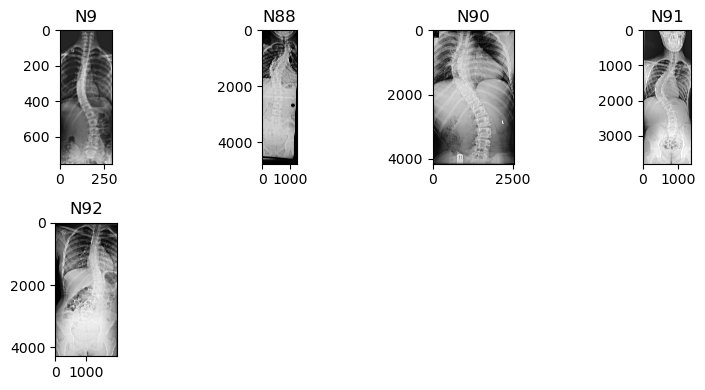

In [4]:
img1 = cv2.imread('Assets/skoliosis/N9,S,15,F_1_0.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('Assets/skoliosis/N88, Rt TAIS, M, 15 Yrs.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('Assets/skoliosis/N90, Rt TAIS, F, 14 Yrs.jpg', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('Assets/skoliosis/N91, Rt TAIS, M, 15 Yrs.jpg', cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread('Assets/skoliosis/N92, Lt LIS, F, 16 Yrs.jpg', cv2.IMREAD_GRAYSCALE)

images = [img1, img2, img3, img4, img5]
titles = ['N9', 'N88', 'N90', 'N91', 'N92']

def show_all(images, titles, cmap='gray'):
    plt.figure(figsize=(8, 4))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 4, i+1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
    plt.tight_layout()
    plt.show()

show_all(images, titles, cmap='gray')

# dan resize

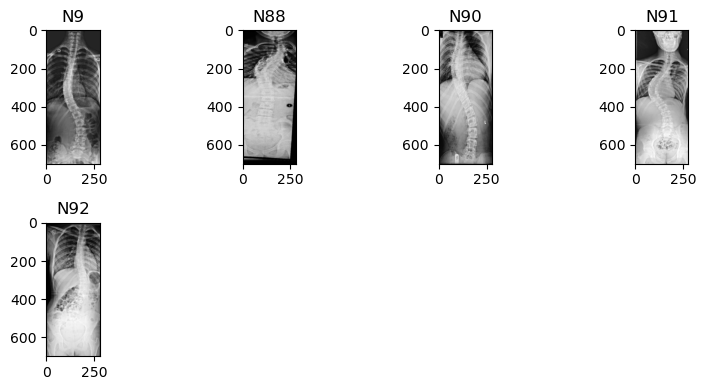

In [11]:
def resize_grayscale_image(gambar_gray, tinggi_tujuan=700, lebar_tujuan=280):

    baris, kolom = gambar_gray.shape[:2]
    resized = np.zeros((tinggi_tujuan, lebar_tujuan), dtype=np.uint8)

    skala_tinggi = baris / tinggi_tujuan
    skala_lebar = kolom / lebar_tujuan

    for i in range(tinggi_tujuan):
        for j in range(lebar_tujuan):
            src_i = min(int(i * skala_tinggi), baris - 1)
            src_j = min(int(j * skala_lebar), kolom - 1)
            resized[i, j] = gambar_gray[src_i, src_j]

    return resized

img1 = resize_grayscale_image(img1, 700, 280)
img2 = resize_grayscale_image(img2, 700, 280)
img3 = resize_grayscale_image(img3, 700, 280)
img4 = resize_grayscale_image(img4, 700, 280)
img5 = resize_grayscale_image(img5, 700, 280)

images = [img1, img2, img3, img4, img5]
def show_all(images, titles, cmap='gray'):
    plt.figure(figsize=(8, 4))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 4, i+1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
    plt.tight_layout()
    plt.show()

show_all(images, titles, cmap='gray')

# Ekualisasi

In [12]:
def histogram_equalization(img):
    hist = np.zeros(256, dtype=int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i, j]] += 1
    cdf = hist.cumsum()
    cdf_normalized = ((cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())).astype(np.uint8)
    equalized = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            equalized[i, j] = cdf_normalized[img[i, j]]
    return equalized

# Median Filter

In [13]:
def median_filter(image, ksize):
    pad = ksize // 2
    padded = np.pad(image, pad, mode='edge')
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+ksize, j:j+ksize]
            median_val = np.median(window)
            output[i, j] = median_val
    return output

# Moprh

In [14]:
def dilation(img):
    dilated = np.zeros_like(img)
    padded = np.pad(img, 1, mode='constant')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            neighborhood = padded[i:i+3, j:j+3]
            dilated[i, j] = np.max(neighborhood)
    return dilated

Output

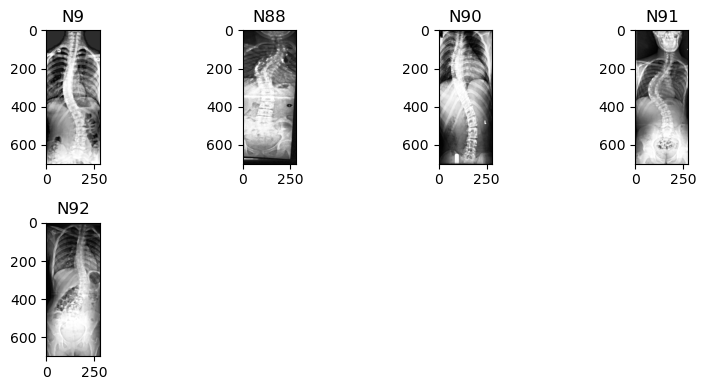

In [16]:
img1_done = dilation(median_filter(histogram_equalization(img1), 3))
img2_done = dilation(median_filter(histogram_equalization(img2), 3))
img3_done = dilation(median_filter(histogram_equalization(img3), 3))
img4_done = dilation(median_filter(histogram_equalization(img4), 3))
img5_done = dilation(median_filter(histogram_equalization(img5), 3))

images_done = [img1_done, img2_done, img3_done, img4_done, img5_done]
titles_done = ['N9', 'N88', 'N90', 'N91', 'N92']

show_all(images_done, titles_done, cmap='gray')